In [1]:
# remove the notebook root logger.\n",
import logging
logger = logging.getLogger()
logger.handlers = []

%matplotlib inline

In [2]:
import pandas as pd


csvfile_link = "https://raw.githubusercontent.com/antoinecarme/pyaf/master/data/passengers_train.csv"
air_passengers_dataframe = pd.read_csv(csvfile_link);
import datetime
air_passengers_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             144 non-null    int64  
 1   time           144 non-null    float64
 2   AirPassengers  144 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.5 KB


In [3]:
def create_model(iActivateCrossVal , iFolds):
    import pyaf.ForecastEngine as autof
    lEngine = autof.cForecastEngine()
    if(iActivateCrossVal):
        lEngine.mOptions.mCrossValidationOptions.mMethod = "TSCV";
        lEngine.mOptions.mCrossValidationOptions.mNbFolds = iFolds
    lEngine.train(air_passengers_dataframe[:-12] , 'time' , 'AirPassengers', 12);
    lEngine.getModelInfo();
    return lEngine

In [4]:
model_no_cross_valid = create_model(False , None)
model_with_cross_valid_5 = create_model(True , 5)
model_with_cross_valid_10 = create_model(True , 10)


INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['AirPassengers'], 'Transformations': [('AirPassengers', 'None', '_', 'T+S+R'), ('AirPassengers', 'None', 'Diff_', 'T+S+R'), ('AirPassengers', 'None', 'RelDiff_', 'T+S+R'), ('AirPassengers', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'AirPassengers', 'Transformation': '_AirPassengers'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'AirPassengers', 'Transformation': 'RelDiff_AirPassengers'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'AirPassengers', 'Transformation': 'Diff_AirPassengers'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'AirPassengers', 'Transformation': 'CumSum_AirPassengers'}))
/home/antoine/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.16.0-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/h

INFO:pyaf.std:AR_MODEL_COEFF 6 _AirPassengers_LinearTrend_residue_bestCycle_byMAPE_residue_Lag13 0.056122360640545
INFO:pyaf.std:AR_MODEL_COEFF 7 _AirPassengers_LinearTrend_residue_bestCycle_byMAPE_residue_Lag16 -0.053793904376158844
INFO:pyaf.std:AR_MODEL_COEFF 8 _AirPassengers_LinearTrend_residue_bestCycle_byMAPE_residue_Lag20 -0.05338841069663214
INFO:pyaf.std:AR_MODEL_COEFF 9 _AirPassengers_LinearTrend_residue_bestCycle_byMAPE_residue_Lag19 -0.04634495542181603
INFO:pyaf.std:AR_MODEL_COEFF 10 _AirPassengers_LinearTrend_residue_bestCycle_byMAPE_residue_Lag32 -0.04124265851819644
INFO:pyaf.std:AR_MODEL_DETAIL_END
INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['AirPassengers'], 'Transformations': [('AirPassengers', 'None', '_', 'T+S+R'), ('AirPassengers', 'None', 'Diff_', 'T+S+R'), ('AirPassengers', 'None', 'RelDiff_', 'T+S+R'), ('AirPassengers', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'AirPassenge

CROSS_VAL_PERF                                             Category  ForecastMAPE
0                      NoTransf_Lag1Trend_NoCycle_AR        0.0679
1                      NoTransf_Lag1Trend_Cycle_5_AR        0.0680
2                Integration_PolyTrend_Cycle_None_AR        0.0693
3                   Integration_PolyTrend_NoCycle_AR        0.0693
4                   Integration_Lag1Trend_NoCycle_AR        0.0698
..                                               ...           ...
59       RelativeDifference_LinearTrend_NoCycle_NoAR      157.4021
60      RelativeDifference_PolyTrend_Cycle_None_NoAR      212.9796
61         RelativeDifference_PolyTrend_NoCycle_NoAR      212.9796
62  RelativeDifference_ConstantTrend_Cycle_None_NoAR     1647.1265
63     RelativeDifference_ConstantTrend_NoCycle_NoAR     1647.1265

[64 rows x 2 columns]


INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.303, ('COMPUTE_PREDICTION_INTERVALS', {'Signal': 'AirPassengers'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.357, ('FINALIZE_TRAINING', {'Signals': ['AirPassengers'], 'Transformations': [('AirPassengers', [('AirPassengers', 'None', 'CumSum_', 'T+S+R'), ('AirPassengers', 'None', 'Diff_', 'T+S+R'), ('AirPassengers', 'None', 'RelDiff_', 'T+S+R'), ('AirPassengers', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.std:TIME_DETAIL TimeVariable='time' TimeMin=1949.0 TimeMax=1956.91666666667 TimeDelta=0.08333333333336763 Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='AirPassengers' Length=132  Min=104 Max=559  Mean=262.49242424242425 StdDev=106.22114554451818
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_AirPassengers' Min=0.0 Max=1.0  Mean=0.3483349983349982 StdDev=0.23345306713080918
INFO:pyaf.std:DECOMPOSITION_TYPE 'T+S+R'
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_AirPa

INFO:pyaf.timing:('OPERATION_START', ('UPDATE_BEST_MODEL_PERFS', {'Signal': 'AirPassengers', 'Model': '_AirPassengers_LinearTrend_residue_bestCycle_byMAPE_residue_AR(33)'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.043, ('UPDATE_BEST_MODEL_PERFS', {'Signal': 'AirPassengers', 'Model': '_AirPassengers_LinearTrend_residue_bestCycle_byMAPE_residue_AR(33)'}))
INFO:pyaf.timing:('OPERATION_START', ('COMPUTE_PREDICTION_INTERVALS', {'Signal': 'AirPassengers'}))


CROSS_VAL_PERF                                             Category  ForecastMAPE
0                      NoTransf_Lag1Trend_NoCycle_AR        0.0679
1                      NoTransf_Lag1Trend_Cycle_5_AR        0.0680
2                Integration_PolyTrend_Cycle_None_AR        0.0693
3                   Integration_PolyTrend_NoCycle_AR        0.0693
4                   Integration_Lag1Trend_NoCycle_AR        0.0698
..                                               ...           ...
59       RelativeDifference_LinearTrend_NoCycle_NoAR      157.4021
60      RelativeDifference_PolyTrend_Cycle_None_NoAR      212.9796
61         RelativeDifference_PolyTrend_NoCycle_NoAR      212.9796
62  RelativeDifference_ConstantTrend_Cycle_None_NoAR     1647.1265
63     RelativeDifference_ConstantTrend_NoCycle_NoAR     1647.1265

[64 rows x 2 columns]


INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.322, ('COMPUTE_PREDICTION_INTERVALS', {'Signal': 'AirPassengers'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.399, ('FINALIZE_TRAINING', {'Signals': ['AirPassengers'], 'Transformations': [('AirPassengers', [('AirPassengers', 'None', 'CumSum_', 'T+S+R'), ('AirPassengers', 'None', 'Diff_', 'T+S+R'), ('AirPassengers', 'None', 'RelDiff_', 'T+S+R'), ('AirPassengers', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.std:TIME_DETAIL TimeVariable='time' TimeMin=1949.0 TimeMax=1956.91666666667 TimeDelta=0.08333333333336763 Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='AirPassengers' Length=132  Min=104 Max=559  Mean=262.49242424242425 StdDev=106.22114554451818
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_AirPassengers' Min=0.0 Max=1.0  Mean=0.3483349983349982 StdDev=0.23345306713080918
INFO:pyaf.std:DECOMPOSITION_TYPE 'T+S+R'
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_AirPa

In [5]:
model_no_cross_valid_forecast = model_no_cross_valid.forecast(air_passengers_dataframe, 12);
model_with_cross_valid_10_forecast = model_with_cross_valid_10.forecast(air_passengers_dataframe, 12);
model_with_cross_valid_5_forecast = model_with_cross_valid_5.forecast(air_passengers_dataframe, 12);


INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['AirPassengers'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.232, ('FORECASTING', {'Signals': ['AirPassengers'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['AirPassengers'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.225, ('FORECASTING', {'Signals': ['AirPassengers'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['AirPassengers'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.23, ('FORECASTING', {'Signals': ['AirPassengers'], 'Horizon': 12}))


<AxesSubplot:xlabel='time'>

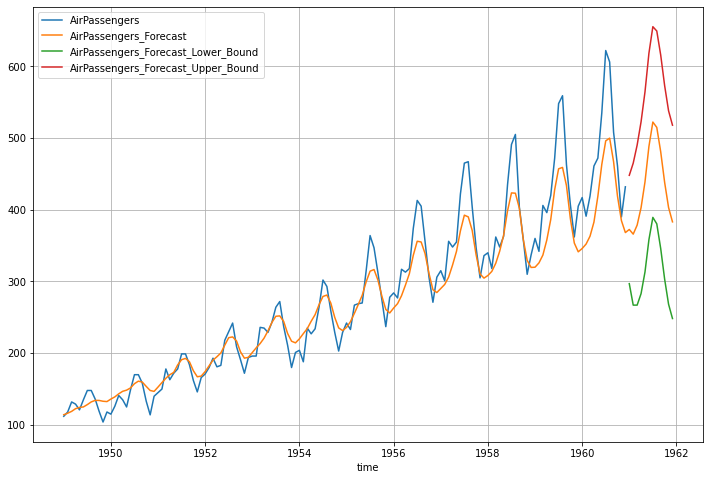

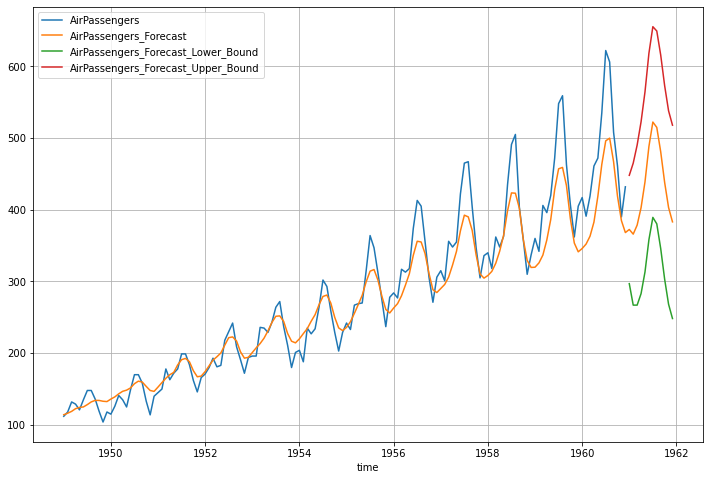

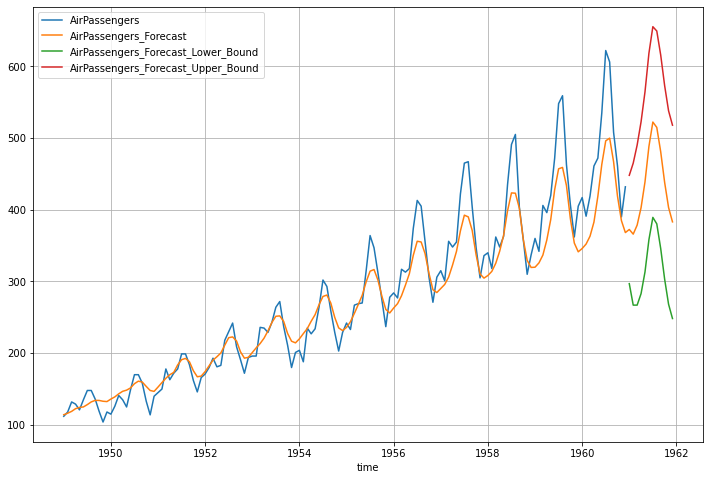

In [6]:
model_no_cross_valid_forecast.plot.line('time', ['AirPassengers' , 'AirPassengers_Forecast', 
                                             'AirPassengers_Forecast_Lower_Bound', 
                                             'AirPassengers_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
model_with_cross_valid_10_forecast.plot.line('time', ['AirPassengers' , 'AirPassengers_Forecast', 
                                             'AirPassengers_Forecast_Lower_Bound', 
                                             'AirPassengers_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
model_with_cross_valid_5_forecast.plot.line('time', ['AirPassengers' , 'AirPassengers_Forecast', 
                                             'AirPassengers_Forecast_Lower_Bound', 
                                             'AirPassengers_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
